# CITS4402 Project: Normalisation Technique Ablation Study

### Group Members:

- Jalil Inayat-Hussain (22751096)
- Felix Mavrodoglu (23720305)
- Reilly Evans (23615971)

In [1]:
# Import project functions
from projectFunctions import formatDataset

# Get the features from the data with default parameters
baseTrainPathes, baseTrainFeatures, baseTrainLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, randomSeed = 48
)
baseTestPathes, baseTestFeatures, baseTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, randomSeed = 48
)

In [2]:
# Import model training and performance analysis functions
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

# Create and train SVM classifier
baseSVM = LinearSVC(random_state = 48)
baseSVM.fit(baseTrainFeatures, baseTrainLabels)

# Get accuracy, precision and recall of SVM on test set
baseTestPredicts = cross_val_predict(
    baseSVM, baseTestFeatures, baseTestLabels, cv = 3
)
baseTestAccuracy = baseSVM.score(baseTestFeatures, baseTestLabels) 
print('Default HOG Parameter Scores:')
print(f'Accuracy:', baseTestAccuracy)
baseTestPrecision = precision_score(baseTestLabels, baseTestPredicts)
print(f'Precision:', baseTestPrecision)
baseTestRecall = recall_score(baseTestLabels, baseTestPredicts)
print(f'Recall:', baseTestRecall)
baseTestFOne = f1_score(baseTestLabels, baseTestPredicts)
print(f'F1 Score:', baseTestFOne)

Default HOG Parameter Scores:
Accuracy: 0.925
Precision: 0.8529411764705882
Recall: 0.87
F1 Score: 0.8613861386138614


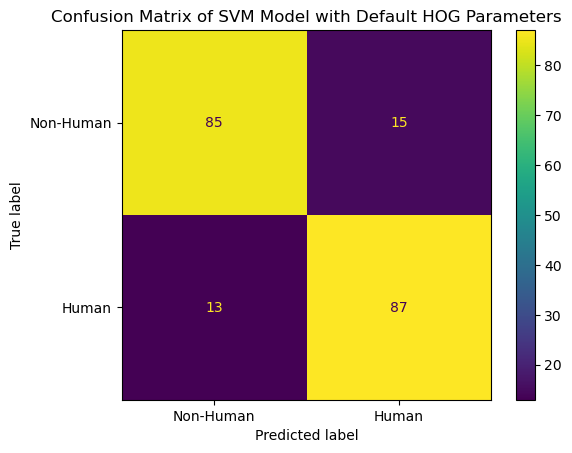

In [3]:
# Import confusion matrix and matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    baseTestLabels, baseTestPredicts,
    display_labels = ['Non-Human', 'Human']
)
plt.title('Confusion Matrix of SVM Model with Default HOG Parameters')
plt.show()

The default HOG parameters use L2-Hys normalisation, which applies Lowe-style clipping to the Euclidean norm. The scikit-image `hog()` allows for 3 additional normalisation techniques:

- L1 (Manhattan norm with no additional processing)
- L1-sqrt (Square root of Manhattan norm)
- L2 (Euclidean norm with no additional processing)

We will now fit 3 additional SVM models using HOG features generated with these normalisation techniques.

In [4]:
# Get features with different normalisation techniques
# L1 normalisation
lOneTrainPathes, lOneTrainFeatures, lOneTrainLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1'
)
lOneTestPathes, lOneTestFeatures, lOneTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1'
)

# L1-sqrt normalisation
sqrtTrainPathes, sqrtTrainFeatures, sqrtTrainLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1-sqrt'
)
sqrtTestPathes, sqrtTestFeatures, sqrtTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L1-sqrt'
)

# L2 normalisation
lTwoTrainPathes, lTwoTrainFeatures, lTwoTrainLabels = formatDataset(
    './ExampleSets/train_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L2'
)
lTwoTestPathes, lTwoTestFeatures, lTwoTestLabels = formatDataset(
    './ExampleSets/test_set.tar.gz', deleteDir = True, 
    randomSeed = 48, normalisationTechnique = 'L2'
)

In [5]:
# Create and train SVM classifiers for each technique
lOneSVM = LinearSVC(random_state = 48)
lOneSVM.fit(lOneTrainFeatures, lOneTrainLabels)

sqrtSVM = LinearSVC(random_state = 48)
sqrtSVM.fit(sqrtTrainFeatures, sqrtTrainLabels)

lTwoSVM = LinearSVC(random_state = 48)
lTwoSVM.fit(lTwoTrainFeatures, lTwoTrainLabels)

# Get accuracy, precision and recall of SVM with different techniques
# L1 normalisation
lOneTestPredicts = cross_val_predict(
    lOneSVM, lOneTestFeatures, lOneTestLabels, cv = 3
)
lOneTestAccuracy = baseSVM.score(lOneTestFeatures, lOneTestLabels) 
lOneTestPrecision = precision_score(lOneTestLabels, lOneTestPredicts)
lOneTestRecall = recall_score(lOneTestLabels, lOneTestPredicts)
lOneTestFOne = f1_score(lOneTestLabels, lOneTestPredicts)

# L1-sqrt normalisation
sqrtTestPredicts = cross_val_predict(
    sqrtSVM, sqrtTestFeatures, sqrtTestLabels, cv = 3
)
sqrtTestAccuracy = baseSVM.score(sqrtTestFeatures, sqrtTestLabels) 
sqrtTestPrecision = precision_score(sqrtTestLabels, sqrtTestPredicts)
sqrtTestRecall = recall_score(sqrtTestLabels, sqrtTestPredicts)
sqrtTestFOne = f1_score(sqrtTestLabels, sqrtTestPredicts)

# L2 normalisation
lTwoTestPredicts = cross_val_predict(
    lTwoSVM, lTwoTestFeatures, lTwoTestLabels, cv = 3
)
lTwoTestAccuracy = baseSVM.score(lTwoTestFeatures, lTwoTestLabels) 
lTwoTestPrecision = precision_score(lTwoTestLabels, lTwoTestPredicts)
lTwoTestRecall = recall_score(lTwoTestLabels, lTwoTestPredicts)
lTwoTestFOne = f1_score(lTwoTestLabels, lTwoTestPredicts)

In [6]:
# Import pandas
import pandas as pd

# Convert model metrics into table
techniqueMetrics = [
    [baseTestAccuracy, baseTestPrecision, baseTestRecall, baseTestFOne],
    [lTwoTestAccuracy, lTwoTestPrecision, lTwoTestRecall, lTwoTestFOne],
    [sqrtTestAccuracy, sqrtTestPrecision, sqrtTestRecall, sqrtTestFOne],
    [lOneTestAccuracy, lOneTestPrecision, lOneTestRecall, lOneTestFOne],
]
techniqueNames = ['L2-Hys (Base)', 'L2', 'L1-sqrt', 'L1']
scoreTypes = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
modelScores = pd.DataFrame(
    techniqueMetrics, index = techniqueNames, columns = scoreTypes
)
modelScores

,Accuracy,Precision,Recall,F1 Score
L2-Hys (Base),0.925,0.852941,0.87,0.861386
L2,0.905,0.858586,0.85,0.854271
L1-sqrt,0.930,0.852941,0.87,0.861386
L1,0.910,0.850000,0.85,0.850000


[discussion of results]

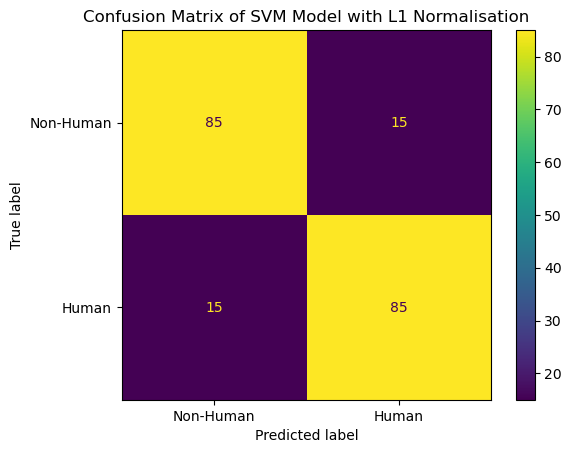

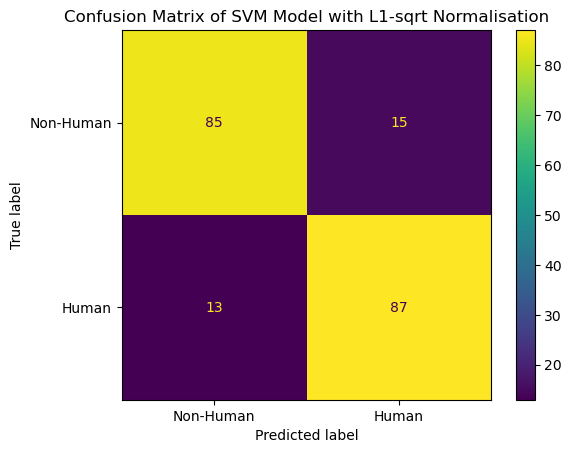

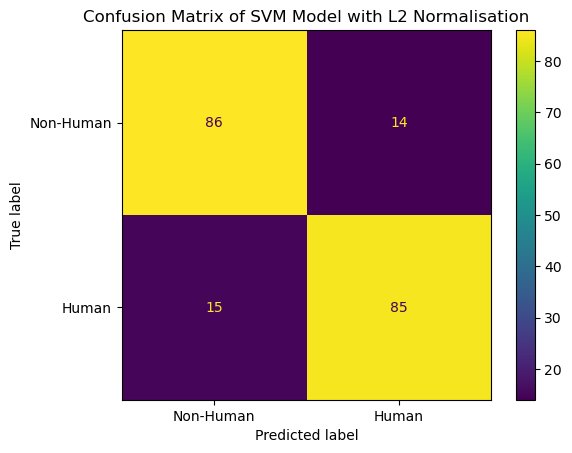

In [7]:
# Display confusion matrices
# L1 normalisation
ConfusionMatrixDisplay.from_predictions(
    lOneTestLabels, lOneTestPredicts,
    display_labels = ['Non-Human', 'Human']
)
plt.title('Confusion Matrix of SVM Model with L1 Normalisation')
plt.show()

# L1-sqrt normalisation
ConfusionMatrixDisplay.from_predictions(
    sqrtTestLabels, sqrtTestPredicts,
    display_labels = ['Non-Human', 'Human']
)
plt.title('Confusion Matrix of SVM Model with L1-sqrt Normalisation')
plt.show()

# L2 normalisation
ConfusionMatrixDisplay.from_predictions(
    lTwoTestLabels, lTwoTestPredicts,
    display_labels = ['Non-Human', 'Human']
)
plt.title('Confusion Matrix of SVM Model with L2 Normalisation')
plt.show()

[report on graphs]

In [8]:
# Report-esque DET graphs